In [ ]:
import pandas as pd
data = pd.read_csv('/content/fish.csv')

In [ ]:
data

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [ ]:
data.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [ ]:
data.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [ ]:
data.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
from sklearn.preprocessing import LabelEncoder
data['Species'] = LabelEncoder().fit_transform(data['Species'])
data.head()

,Species,Weight,Length,Diagonal,Height,Width
0,0,242.0,25.4,30.0,11.5200,4.0200
1,0,290.0,26.3,31.2,12.4800,4.3056
2,0,340.0,26.5,31.1,12.3778,4.6961
3,0,363.0,29.0,33.5,12.7300,4.4555
4,0,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
data.head()

,Species,Weight,Length,Diagonal,Height,Width
0,0,242.0,25.4,30.0,11.5200,4.0200
1,0,290.0,26.3,31.2,12.4800,4.3056
2,0,340.0,26.5,31.1,12.3778,4.6961
3,0,363.0,29.0,33.5,12.7300,4.4555
4,0,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
x = data.drop('Species',axis=1)
y = data[['Species']]

In [ ]:
x.describe()

,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


In [ ]:
x,y

(     Weight  Length  Diagonal   Height   Width
 0     242.0    25.4      30.0  11.5200  4.0200
 1     290.0    26.3      31.2  12.4800  4.3056
 2     340.0    26.5      31.1  12.3778  4.6961
 3     363.0    29.0      33.5  12.7300  4.4555
 4     430.0    29.0      34.0  12.4440  5.1340
 ..      ...     ...       ...      ...     ...
 154    12.2    12.2      13.4   2.0904  1.3936
 155    13.4    12.4      13.5   2.4300  1.2690
 156    12.2    13.0      13.8   2.2770  1.2558
 157    19.7    14.3      15.2   2.8728  2.0672
 158    19.9    15.0      16.2   2.9322  1.8792
 
 [159 rows x 5 columns],
      Species
 0          0
 1          0
 2          0
 3          0
 4          0
 ..       ...
 154        5
 155        5
 156        5
 157        5
 158        5
 
 [159 rows x 1 columns])

In [ ]:
#10^2, 10^1, 10^0
#minmaxscaler ->column , normalizer (range) ->row

In [ ]:
from sklearn.preprocessing import Normalizer
x = Normalizer().fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=2,stratify=y)

In [ ]:
ytest.Species.value_counts()

2    11
0     7
4     4
3     4
5     3
1     2
6     1
Name: Species, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(xtrain,ytrain)
print("Training Score: ",log.score(xtrain,ytrain))
print("Testing Score: ", log.score(xtest,ytest)) #overfitting training score > testing score . training loss < testing loss.

Training Score:  0.4330708661417323
Testing Score:  0.4375


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import classification_report
ypred = log.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00         2
           2       0.38      1.00      0.55        11
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         4
           5       1.00      1.00      1.00         3
           6       0.00      0.00      0.00         1

    accuracy                           0.44        32
   macro avg       0.20      0.29      0.22        32
weighted avg       0.22      0.44      0.28        32



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import f1_score


models = [LogisticRegression(),KNeighborsClassifier(2),RandomForestClassifier(n_jobs=-1),DecisionTreeClassifier(),GaussianNB(),SVC()]

train_scores = {} #dictionary
test_score = {}
f1_scores = {}

for model in models:
    model.fit(xtrain,ytrain)
    train_scores[type(model).__name__] = model.score(xtrain,ytrain)
    test_score[type(model).__name__] = model.score(xtest,ytest)
    ypred = model.predict(xtest)
    f1_scores[type(model).__name__] =  f1_score(ytest,ypred,average='macro')

c:\Users\KAFI\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KAFI\.conda\envs\tensorflow\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\KAFI\.conda\envs\tensorflow\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\KAFI\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expe

<BarContainer object of 6 artists>

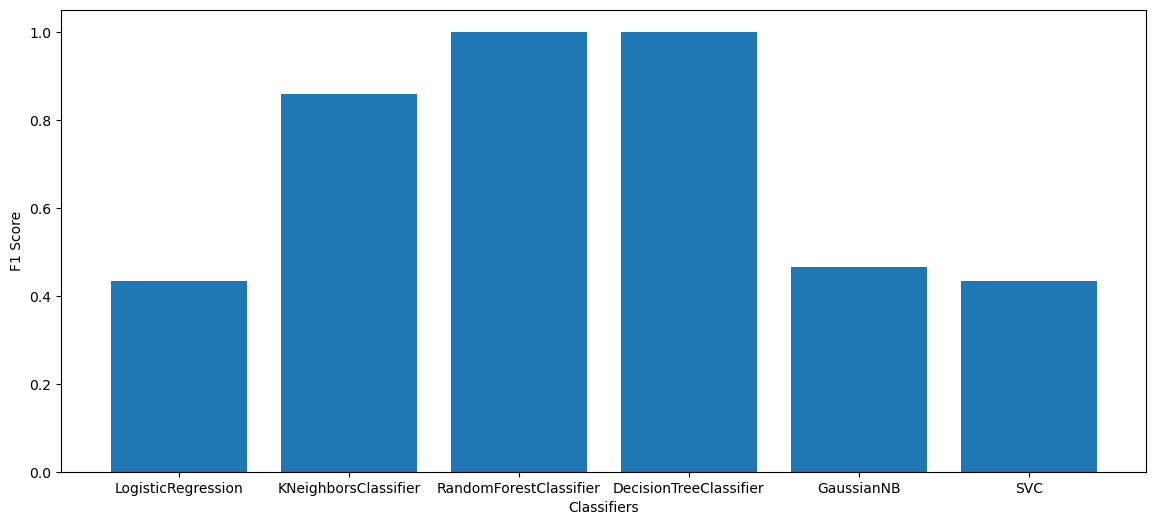

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
plt.xlabel("Classifiers")
plt.ylabel('F1 Score')
plt.bar(list(train_scores.keys()),list(train_scores.values())) #95% = random forest and xgboost  best

In [ ]:
train_scores

{'LogisticRegression': 0.4330708661417323,
 'KNeighborsClassifier': 0.8582677165354331,
 'RandomForestClassifier': 1.0,
 'DecisionTreeClassifier': 1.0,
 'GaussianNB': 0.4645669291338583,
 'SVC': 0.4330708661417323}

In [ ]:
test_score

{'LogisticRegression': 0.4375,
 'KNeighborsClassifier': 0.78125,
 'RandomForestClassifier': 0.78125,
 'DecisionTreeClassifier': 0.78125,
 'GaussianNB': 0.5,
 'SVC': 0.4375}